In [1]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Продажа домов в округе Кинг, США

## Описание, чтение, визуализация

Здесь собраны данные по продажам домов в округе Кинг за 2014-2015г. Из этой статистики можно узнать, по каким примерно ценам продавались дома, а также зависимость цены от других аспектов. Загрузим данные о ценах:

In [2]:
url = "https://raw.githubusercontent.com/AnastasiaKashnevich/MachineLearning/master/kc_house_data.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одному дому) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [3]:
data_raw.shape

(21613, 21)

Метод data_raw.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [4]:
data_raw.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

А вот последние строки:

In [5]:
data_raw.tail()

id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

Мы видим, что столбцы (признаки) имеют имена

* id - Уникальный идентификатор для каждого проданного дома, 
* date - Дата продажи дома,
* price - Цена каждого проданного дома,
* bedrooms - Кол-во спален,
* bathrooms - Количество ванных комнат, где 0,5 приходится на комнату с туалетом, но без душа,
* sqft_living - Метраж внутренней жилой площади,
* sqft_lot - Метраж земельного участка,
* floors - Количество этажей,
* waterfront - Фиктивная переменная, указывающая, выходят ли аппартаменты на набережную или нет,
* view - Индекс от 0 до 4 того, насколько хорош вид собственности,
* condition - Индекс от 1 до 5 по состоянию апартаметов,
* grade - Индекс от 1 до 13, где 1-3 отстают от строительства и проектирования, 7 - средний уровень строительства и проектирования, а 11-13 - высокий уровень качества строительства и проектирования,
* sqft_above - Площадь внутреннего жилого пространства над уровнем земли,
* sqft_basement - Площадь внутреннего жилого пространства ниже уровня земли,
* yr_built - год постройки дома,
* yr_renovated - Год последней реновации дома,
* zipcode - В каком районе (почтового индекса) находится дом,
* lat - географическая широта объекта,
* long - географическая долгота объекта,
* sqft_living15 - Метраж внутренней жилой площади жилья для ближайших 15 соседей,
* sqft_lot15 - Площадь земельных участков ближайших 15 соседей

Признаки date - номинальный (категориальный), id, waterfront, grade, view, condition и zipcode - номинальные (категориальные), но представленные в числовом виде, остальные признаки (включая целевой признак price) - количественные (числовые).


Имена столбцов (признаков) можно получить таким образом:

In [6]:
data_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Имена строк (совпадают с номерами)

In [7]:
data_raw.index

RangeIndex(start=0, stop=21613, step=1)

Визуализация и описательная статистика - важные этапы анализа данных. Сводную информацию о признаках можем получить, вызвав метод describe:

In [8]:
data_raw.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Построим все возможные диаграммы рассеивания для каждой пары переменных:

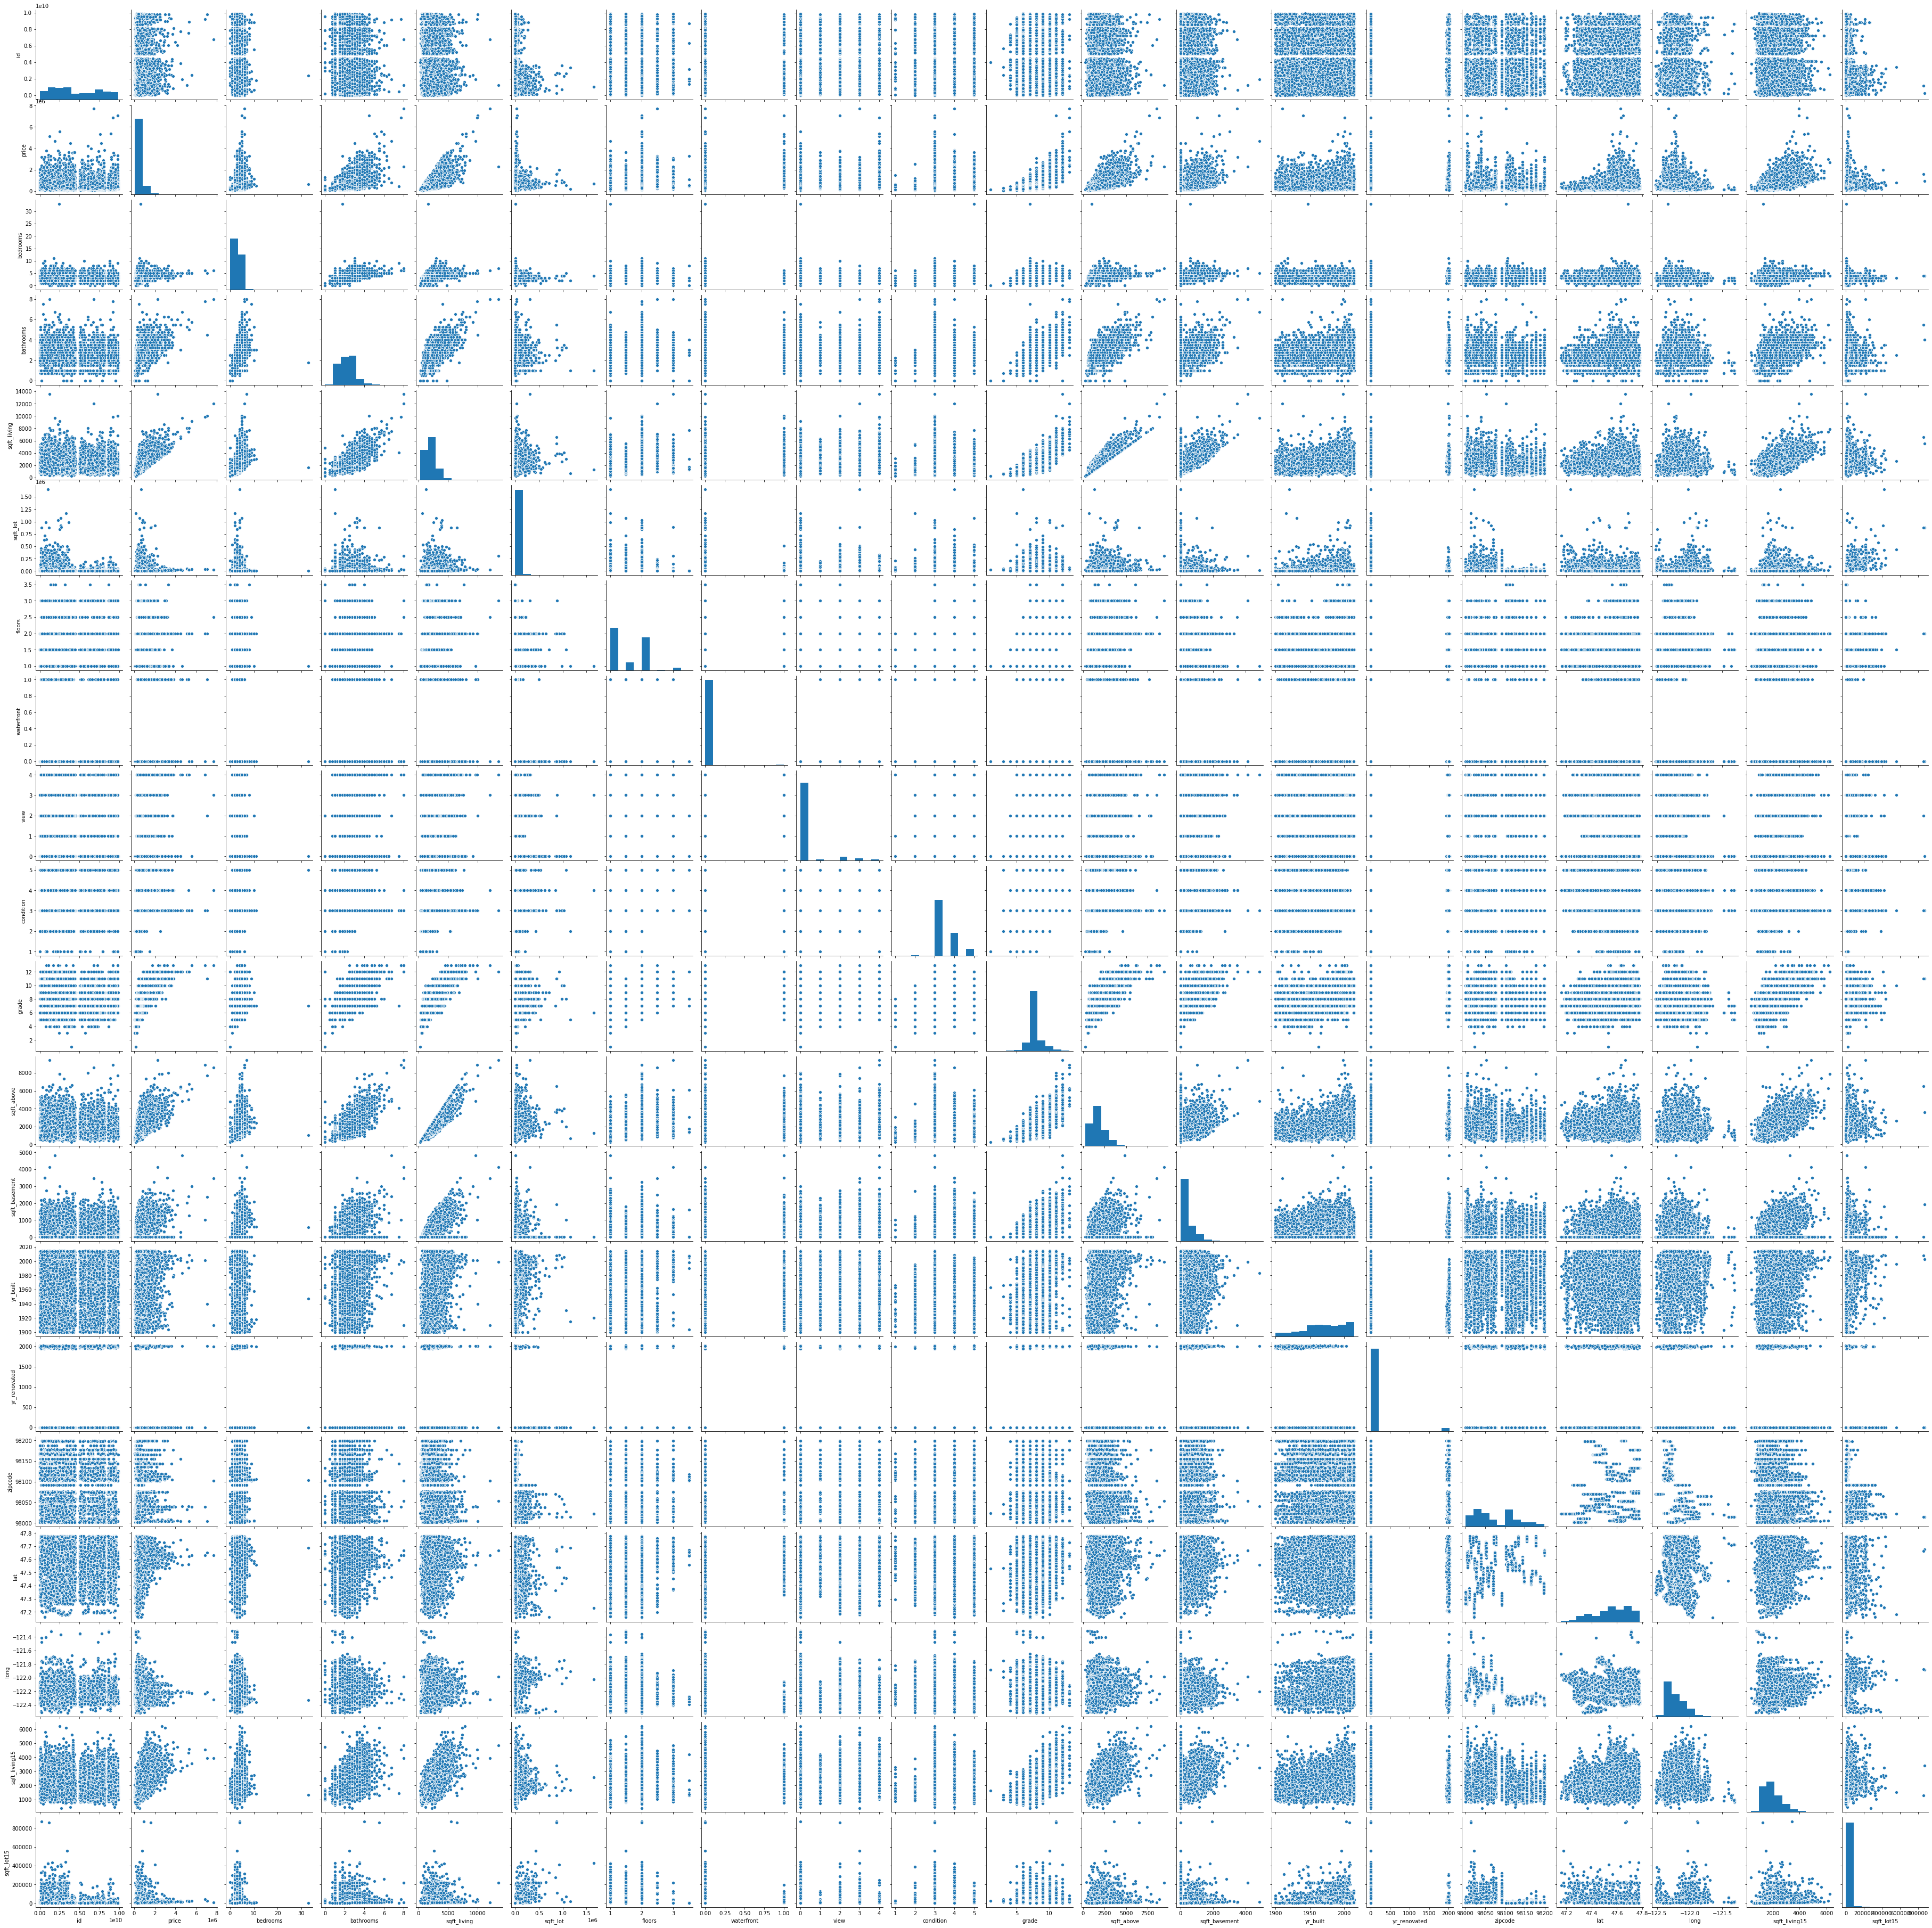

In [9]:
sns.pairplot(data_raw, diag_kind='hist')
pass

На диагонали расположены гистограммы распределения признаков. Гистограммы можно построить отдельно.
Построить гистограмму можно с помощю функции plt.hist, но мы воспользуемся distplot из библиотеки seaborn.

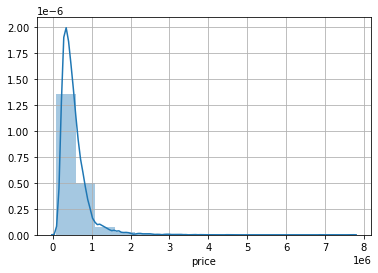

In [11]:
sns.distplot(data_raw['price'], bins=15)
plt.grid()
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [12]:
corr_mat = data_raw.corr()
corr_mat

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016762  0.001286   0.005160    -0.012258 -0.132109   
price         -0.016762  1.000000  0.308350   0.525138     0.702035  0.089661   
bedrooms       0.001286  0.308350  1.000000   0.515884     0.576671  0.031703   
bathrooms      0.005160  0.525138  0.515884   1.000000     0.754665  0.087740   
sqft_living   -0.012258  0.702035  0.576671   0.754665     1.000000  0.172826   
sqft_lot      -0.132109  0.089661  0.031703   0.087740     0.172826  1.000000   
floors         0.018525  0.256794  0.175429   0.500653     0.353949 -0.005201   
waterfront    -0.002721  0.266369 -0.006582   0.063744     0.103818  0.021604   
view           0.011592  0.397293  0.079532   0.187737     0.284611  0.074710   
condition     -0.023783  0.036362  0.028472  -0.124982    -0.058753 -0.008958   
grade          0.008130  0.667434  0.356967   0.664983     0.762704  0.113621   
sqft_above    -0.010842  0.605567  0.477600   0.685342     0.876597  0.183512   
sqft_basement -0.005151  0.323816  0.303093   0.283770     0.435043  0.015286   
yr_built       0.021380  0.054012  0.154178   0.506019     0.318049  0.053080   
yr_renovated  -0.016907  0.126434  0.018841   0.050739     0.055363  0.007644   
zipcode       -0.008224 -0.053203 -0.152668  -0.203866    -0.199430 -0.129574   
lat           -0.001891  0.307003 -0.008931   0.024573     0.052529 -0.085683   
long           0.020799  0.021626  0.129473   0.223042     0.240223  0.229521   
sqft_living15 -0.002901  0.585379  0.391638   0.568634     0.756420  0.144608   
sqft_lot15    -0.138798  0.082447  0.029244   0.087175     0.183286  0.718557   

                 floors  waterfront      view  condition     grade  \
id             0.018525   -0.002721  0.011592  -0.023783  0.008130   
price          0.256794    0.266369  0.397293   0.036362  0.667434   
bedrooms       0.175429   -0.006582  0.079532   0.028472  0.356967   
bathrooms      0.500653    0.063744  0.187737  -0.124982  0.664983   
sqft_living    0.353949    0.103818  0.284611  -0.058753  0.762704   
sqft_lot      -0.005201    0.021604  0.074710  -0.008958  0.113621   
floors         1.000000    0.023698  0.029444  -0.263768  0.458183   
waterfront     0.023698    1.000000  0.401857   0.016653  0.082775   
view           0.029444    0.401857  1.000000   0.045990  0.251321   
condition     -0.263768    0.016653  0.045990   1.000000 -0.144674   
grade          0.458183    0.082775  0.251321  -0.144674  1.000000   
sqft_above     0.523885    0.072075  0.167649  -0.158214  0.755923   
sqft_basement -0.245705    0.080588  0.276947   0.174105  0.168392   
yr_built       0.489319   -0.026161 -0.053440  -0.361417  0.446963   
yr_renovated   0.006338    0.092885  0.103917  -0.060618  0.014414   
zipcode       -0.059121    0.030285  0.084827   0.003026 -0.184862   
lat            0.049614   -0.014274  0.006157  -0.014941  0.114084   
long           0.125419   -0.041910 -0.078400  -0.106500  0.198372   
sqft_living15  0.279885    0.086463  0.280439  -0.092824  0.713202   
sqft_lot15    -0.011269    0.030703  0.072575  -0.003406  0.119248   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id              -0.010842      -0.005151  0.021380     -0.016907 -0.008224   
price            0.605567       0.323816  0.054012      0.126434 -0.053203   
bedrooms         0.477600       0.303093  0.154178      0.018841 -0.152668   
bathrooms        0.685342       0.283770  0.506019      0.050739 -0.203866   
sqft_living      0.876597       0.435043  0.318049      0.055363 -0.199430   
sqft_lot         0.183512       0.015286  0.053080      0.007644 -0.129574   
floors           0.523885      -0.245705  0.489319      0.006338 -0.059121   
waterfront       0.072075       0.080588 -0.026161      0.092885  0.030285   
view             0.167649       0.276947 -0.053440      0.103917  0.084827   
condition       -0.158214       0.174105 -0.361417     -0.060618  0.

Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

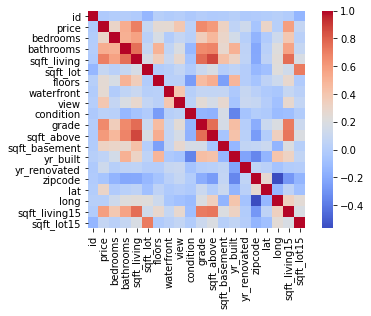

In [13]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [14]:
corr_mat > 0.5

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False       True         True     False   
bedrooms       False  False      True       True         True     False   
bathrooms      False   True      True       True         True     False   
sqft_living    False   True      True       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False       True        False     False   
waterfront     False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False   True     False       True         True     False   
sqft_above     False   True     False       True         True     False   
sqft_basement  False  False     False      False        False     False   
yr_built       False  False     False       True        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False   True     False       True         True     False   
sqft_lot15     False  False     False      False        False      True   

               floors  waterfront   view  condition  grade  sqft_above  \
id              False       False  False      False  False       False   
price           False       False  False      False   True        True   
bedrooms        False       False  False      False  False       False   
bathrooms        True       False  False      False   True        True   
sqft_living     False       False  False      False   True        True   
sqft_lot        False       False  False      False  False       False   
floors           True       False  False      False  False        True   
waterfront      False        True  False      False  False       False   
view            False       False   True      False  False       False   
condition       False       False  False       True  False       False   
grade           False       False  False      False   True        True   
sqft_above       True       False  False      False   True        True   
sqft_basement   False       False  False      False  False       False   
yr_built        False       False  False      False  False       False   
yr_renovated    False       False  False      False  False       False   
zipcode         False       False  False      False  False       False   
lat             False       False  False      False  False       False   
long            False       False  False      False  False       False   
sqft_living15   False       False  False      False   True        True   
sqft_lot15      False       False  False      False  False       False   

               sqft_basement  yr_built  yr_renovated  zipcode    lat   long  \
id                     False     False         False    False  False  False   
price                  False     False         False    False  False  False   
bedrooms               False     False         False    False  False  False   
bathrooms              False      True         False    False  False  False   
sqft_living            False     False         False    False  False  False   
sqft_lot               False     False         False    False  False  False   
floors                 False     False         False    False  False  False   
waterfront             False     False         False    False  False  False   
view                   False     False         False    False  False  False   
condition              False     False         False    False  False  False   
grade             

In [15]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending=False)

sqft_living  sqft_above       0.876597
             grade            0.762704
             sqft_living15    0.756420
grade        sqft_above       0.755923
bathrooms    sqft_living      0.754665
sqft_above   sqft_living15    0.731870
sqft_lot     sqft_lot15       0.718557
grade        sqft_living15    0.713202
price        sqft_living      0.702035
bathrooms    sqft_above       0.685342
price        grade            0.667434
bathrooms    grade            0.664983
price        sqft_above       0.605567
             sqft_living15    0.585379
bedrooms     sqft_living      0.576671
bathrooms    sqft_living15    0.568634
price        bathrooms        0.525138
floors       sqft_above       0.523885
bedrooms     bathrooms        0.515884
bathrooms    yr_built         0.506019
             floors           0.500653
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.

Обратите внимание на большую корреляцию между ценой дома и его внутренней жилой площадью:

In [16]:
corr_mat.loc['price', 'sqft_living']

0.7020350546118009

Также обратите внимание, что коэффициент корреляции между 'price', 'yr_built' очень близок к нулю.

In [17]:
corr_mat.loc['price', 'yr_built']

0.05401153149478604

## Подготовка данных

### Обработка пропущенных значений

Сначала удалим ненужный нам столбец - date, так как этот признак ни на что не влияет.

In [18]:
data_raw = data_raw.drop("date", axis = 1)

Посмотрим, сколько пропущенных значений в каждом столбце матрицы:

In [19]:
data_raw.isna().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Пропущенные значения в этих данных отсутствуют.

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.

Наиболее часто используют один из двух следующих способов:

* приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
* стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.

Выполним стандартизацию всех признаков:

In [20]:
data_stand = (data_raw - data_raw.mean(axis = 0))/data_raw.std(axis = 0)
data_stand.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
mean   1.854293e-16 -2.099936e-17  7.966196e-16  4.750304e-15  2.164660e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.591934e+00 -1.266831e+00 -3.624320e+00 -2.745856e+00 -1.948846e+00   
25%   -8.542313e-01 -5.941759e-01 -3.987279e-01 -4.736105e-01 -7.108783e-01   
50%   -2.347838e-01 -2.453867e-01 -3.987279e-01  1.756026e-01 -1.849871e-01   
75%    9.485614e-01  2.857643e-01  6.764694e-01  5.002092e-01  5.118460e-01   
max    1.849323e+00  1.950254e+01  3.185719e+01  7.641553e+00  1.247778e+01   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04  2.161300e+04   
mean   1.537582e-16 -7.674835e-16 -1.172344e-15 -2.130659e-15 -1.305018e-14   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.521677e-01 -9.154058e-01 -8.717061e-02 -3.057524e-01 -3.702582e+00   
25%   -2.430431e-01 -9.154058e-01 -8.717061e-02 -3.057524e-01 -6.291723e-01   
50%   -1.808034e-01  1.053914e-02 -8.717061e-02 -3.057524e-01 -6.291723e-01   
75%   -1.066855e-01  9.364841e-01 -8.717061e-02 -3.057524e-01  9.075325e-01   
max    3.950342e+01  3.714319e+00  1.147123e+01  4.914016e+00  2.444237e+00   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  2.161300e+04  2.161300e+04   2.161300e+04  2.161300e+04  2.161300e+04   
mean  -4.470126e-15 -6.304894e-16   2.510995e-15  3.007727e-15 -7.172823e-15   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -5.663213e+00 -1.809452e+00  -6.586658e-01 -2.417327e+00 -2.101235e-01   
25%   -5.588228e-01 -7.226147e-01  -6.586658e-01 -6.810627e-01 -2.101235e-01   
50%   -5.588228e-01 -2.758039e-01  -6.586658e-01  1.360027e-01 -2.101235e-01   
75%    2.919089e-01  5.091340e-01   6.066563e-01  8.849794e-01 -2.101235e-01   
max    4.545567e+00  9.203831e+00   1.023214e+01  1.497779e+00  4.806317e+00   

            zipcode           lat          long  sqft_living15    sqft_lot15  
count  2.161300e+04  2.161300e+04  2.161300e+04   2.161300e+04  2.161300e+04  
mean  -8.970231e-14  2.732107e-13 -4.577422e-12   2.712246e-17 -1.529902e-16  
std    1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  
min   -1.437992e+00 -2.916727e+00 -2.166493e+00  -2.316272e+00 -4.437949e-01  
25%   -8.399174e-01 -6.426828e-01 -8.102318e-01  -7.244803e-01 -2.808528e-01  
50%   -2.418428e-01  8.478036e-02 -1.143491e-01  -2.138231e-01 -1.885593e-01  
75%    7.487184e-01  8.512148e-01  6.312394e-01   5.448676e-01 -9.835328e-02  
max    2.262595e+00  1.570018e+00  6.382923e+00   6.162097e+00  3.143957e+01

## X и y

Для классификации домов по признаку "waterfront", будем использовать все входные признаки, кроме 'id'.

In [21]:
data_stand.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [22]:
X = data_stand.drop(['waterfront', 'id'], axis = 1)
y = data_raw['waterfront']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(16209, 5404)

## KNN

Применим метод ближайших соседей. Начальное количество соседей равно 10.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Предскажем данные для тестовой и обучающей выборки:

In [25]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print(y_test_predict)
print(y_train_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


Посчитаем ошибку на тестовой и обучающей выборке:

In [26]:
err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train)
print(err_test)

0.005860941452279598
0.008697261287934863


Построим матрицу неточностей для оценки точности:

In [27]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[5353    1]
 [  46    4]]


Таким образом, верно предсказано, что 5353 дома имеют выход к набережной и 4 - нет. 1 дом имел выход к набережной, но модель посчитала иначе, а 46 домов не имели, но модель посчитала, что они выходят на набережную.

## Подбор параметров

In [28]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.004812073023053864 1


In [29]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

err_1 = err_test

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.0
test error: 0.006291635825314582


## PCA

In [30]:
from sklearn.decomposition import PCA
pca_model = PCA(n_components = 2)
pca_model.fit(X)
print("Главные компоненты (по строкам):")
print(pca_model.components_)
print("Дисперсии по главным компонентам:")
print(pca_model.explained_variance_)

Главные компоненты (по строкам):
[[ 0.29680619  0.2357927   0.34969105  0.38819726  0.09421113  0.21967875
   0.12318783 -0.07024339  0.36107254  0.37807456  0.09818924  0.21914522
   0.01130093 -0.13853795  0.01970079  0.16058231  0.34595468  0.09961753]
 [ 0.30199102  0.1090029   0.03113629  0.13901182 -0.15659908 -0.15507377
   0.27930849  0.21068635  0.05540568 -0.05888121  0.39865135 -0.36526842
   0.16922058  0.34592769  0.27678021 -0.39112841  0.03502705 -0.166298  ]]
Дисперсии по главным компонентам:
[5.65872258 2.35518477]


In [31]:
print("Среднеквадратические отклонения:")
print(np.sqrt(pca_model.explained_variance_))

Среднеквадратические отклонения:
[2.37880697 1.53466113]


In [43]:
pca_model = PCA(n_components = 2)
pca_model.fit(X)
X_pca = pca_model.transform(X)
print(X.shape)
print(X_pca.shape)
print(X_pca)

(21613, 18)
(21613, 2)
[[-2.78734614  0.06583309]
 [-0.11908425  1.72639744]
 [-2.74329823 -0.43658572]
 ...
 [-2.47229821 -0.79966792]
 [ 0.10721438 -1.95203667]
 [-2.54512902 -0.84626259]]


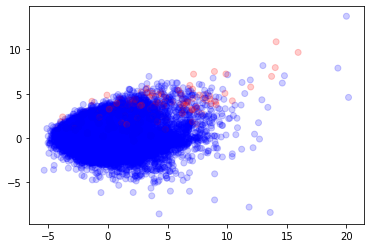

In [33]:
colors = ['b' if yy == 0 else 'r' for yy in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], color = colors, alpha = 0.2)

### Применим KNN с наилучшим количеством сосдей = 1

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

15129 6484


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print("train error: " + str(err_train)) 
print("test error: " + str(err_test))

train error: 0.0
test error: 0.01418877236273905


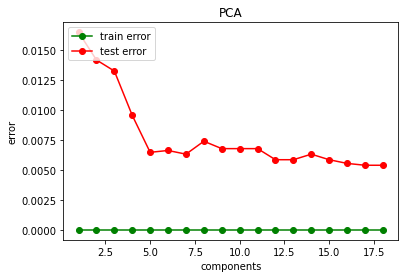

In [36]:
comp = range(1, 19, 1)
err_train_mas = []
err_test_mas = []
for temp in comp:
    pca = PCA(n_components = temp)
    X_PCA = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size = 0.3, random_state = 42)
    knn = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
    err_train_mas.append(np.mean(knn.predict(X_train) != y_train))
    err_test_mas.append(np.mean(knn.predict(X_test) != y_test))
plt.plot(comp, err_train_mas, 'g-o', label = 'train error')
plt.plot(comp, err_test_mas,  'r-o', label = 'test error') 
plt.title('PCA')
plt.xlabel('components')
plt.ylabel('error')
plt.legend(loc = 2)

In [37]:
err_2 = np.min(err_test_mas)
print(err_2)

0.0053979025293029


In [38]:
np.argmin(err_test_mas)

16

In [39]:
print(err_1 - err_2)

0.000893733296011682


Минимальная ошибка: 0.0053979025293029

## LDA

In [40]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42) 
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)

In [41]:
err_train_lda = np.mean(y_train != knn.predict(X_train))
err_test_lda  = np.mean(y_test  != knn.predict(X_test))
print("train error: " + str(err_train_lda)) 
print("test error: " + str(err_test_lda))

train error: 0.009994447529150472
test error: 0.014063656550703183


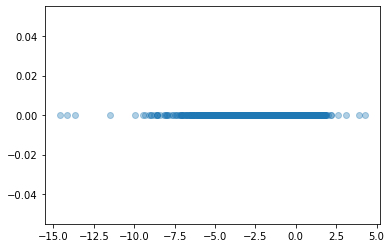

In [42]:
X_l=np.zeros(len(X_lda))
plt.scatter(X_lda[:, 0], X_l, alpha = 0.35)